# Titanic Survival Prediction using Logistic Regression

## **Step 1: Load the Dataset**
We first load the Titanic dataset using **pandas** and inspect its structure.

In [7]:
import pandas as pd

# Load the dataset
file_path = "./Titanic_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Key Learning Points**:
- Understand the dataset format.
- Recognize common issues like missing values.

## **Step 2: Understand the Dataset**
We inspect the dataset's columns and types.

In [8]:
print(df.shape)
df.info()
df.describe()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **Key Learning Points**:
- **Categorical vs. Numerical Data**: Identify which columns are categorical (e.g., "Sex", "Embarked") and which are numerical (e.g., "Age", "Fare").
- **Check for Missing Values**.

---

## **Step 3: Exploratory Data Analysis (EDA)**
We visualize and analyze data distributions to understand patterns.

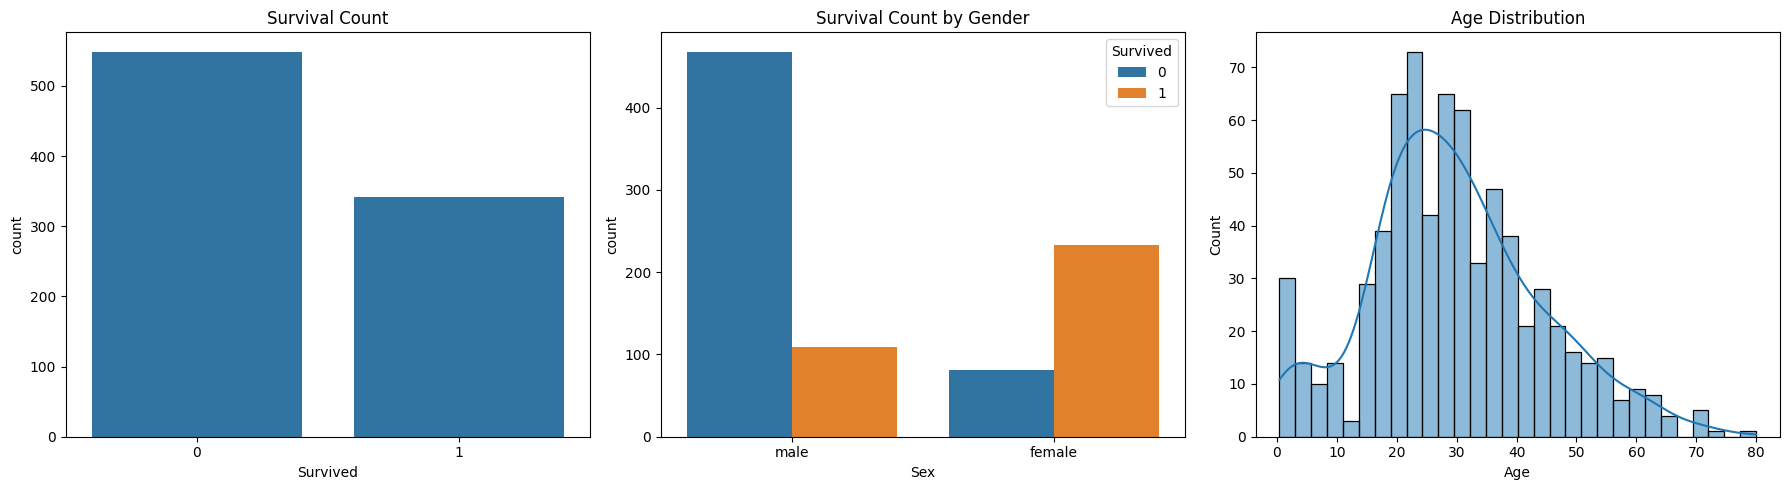

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Check survival distribution
sns.countplot(x="Survived", data=df, ax=axes[0])
axes[0].set_title("Survival Count")

# Visualizing the impact of gender
sns.countplot(x="Sex", hue="Survived", data=df, ax=axes[1])
axes[1].set_title("Survival Count by Gender")

# Distribution of age
sns.histplot(df["Age"].dropna(), bins=30, kde=True, ax=axes[2])
axes[2].set_title("Age Distribution")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### **Key Learning Points**:
- Class imbalance in survival.
- Gender-based survival differences.
- Age distribution insights.

---

## **Step 4: Handle Missing Values**
We check and fill missing values appropriately.

In [10]:
# Check missing values
print(df.isnull().sum())

# Fill missing Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
df.drop(columns=["Cabin"], inplace=True)

print(df.isnull().sum())  # Confirm no missing values remain

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# **Imputation with Mean, Median, and Mode**

## **What is Imputation?**
Imputation is the process of replacing missing values in a dataset with substituted values. It is a crucial step in data preprocessing because many machine learning algorithms do not handle missing values well.

---

## **1. Mean Imputation**
- **Definition**: The mean (average) is calculated by summing all values and dividing by the count.
- **Formula**:  
  $\text{Mean} = \frac{\sum X}{N}$
  
- **When to Use**:  
  - Works well for **normally distributed** data.
  - Not suitable for **skewed** distributions, as extreme values (outliers) can significantly affect the mean.

---

## **2. Median Imputation**
- **Definition**: The median is the middle value when data is sorted.
- **Formula**:  
  - If **odd number** of values:  
    $\text{Median} = \text{Middle value}$
    
  - If **even number** of values:  
    $\text{Median} = \frac{\text{Middle two values}}{2}$

- **When to Use**:
  - Preferred when data is **skewed** or contains **outliers**.
  - More robust than the mean, as it is less affected by extreme values.

---

## **3. Mode Imputation**
- **Definition**: The mode is the most frequently occurring value in a dataset.
- **When to Use**:
  - Ideal for **categorical data** (e.g., "Embarked" column).
  - Used when a specific category appears **dominantly** in a dataset.

---

## **Why Use Median for "Age" and Mode for "Embarked"?**
### **"Age" (Numerical Feature)**
- The **Age** column in the Titanic dataset has missing values.
- Since age distribution is often **skewed**, the **median** is preferred over the mean to avoid the influence of outliers.
- **Example**: If a dataset has ages `[10, 20, 25, 30, 35, 100]`, the **mean** would be skewed by 100, while the **median (27.5)** represents the central tendency better.

```python
df["Age"].fillna(df["Age"].median(), inplace=True)
```

---

### **"Embarked" (Categorical Feature)**
- The **Embarked** column represents ports (e.g., 'S', 'C', 'Q') where passengers boarded.
- Since it is **categorical**, using the **mode (most frequent category)** makes sense.
- **Example**: If most passengers embarked from **'S'**, we replace missing values with **'S'**.

```python
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
```

---

## **Summary of Usage**
| Method  | Best for  | Why?  | Example Column |
|---------|----------|------|---------------|
| **Mean** | Numerical (Normally Distributed) | Affected by outliers, useful for balanced data | since Age is skewed, it is better to not use this |
| **Median** | Numerical (Skewed Data) | Less affected by outliers | `Age` |
| **Mode** | Categorical Data | Fills missing values with the most common category | `Embarked` |

By choosing the **right imputation method**, we ensure better data quality and improve model accuracy. 🚀
### **Key Learning Points**:
- Handling missing values strategically.
- Why we drop high-missing-value columns.

---

## **Step 5: Convert Categorical Features**
We encode categorical variables for model training.

In [11]:
# Convert 'Sex' column to numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# One-hot encode 'Embarked' column
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1


### **Key Learning Points**:
- Encoding categorical data.
- One-hot encoding and binary mapping.

---

## **Step 6: Select Features and Split Data**
We choose meaningful features and split data for training and testing.

In [12]:
from sklearn.model_selection import train_test_split

# Select features and target variable
features = ["Pclass", "Sex", "Age", "Fare", "Embarked_Q", "Embarked_S"]
X = df[features]
y = df["Survived"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((712, 6), (179, 6))

### **Key Learning Points**:
- Feature selection.
- Splitting data for training/testing.

---

## **Step 7: Train Logistic Regression Model**
We use **scikit-learn** to train a **Logistic Regression model** on the Titanic dataset.


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)


### **Key Learning Points**:
- Understand how **Logistic Regression** works as a classification model.
- Learn about the **maximum iterations (`max_iter`)** parameter for convergence.

---

## **Step 8: Evaluate Model Performance**
We evaluate how well the model performs using **accuracy**, **confusion matrix**, and **classification report**.

In [14]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Model Accuracy: 0.7989
Confusion Matrix:
 [[88 17]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### **Key Learning Points**:
- **Accuracy**: Measures overall performance.
- **Confusion Matrix**: Helps analyze false positives and false negatives.
- **Precision, Recall, F1-score**: Key classification metrics.

---

## **Step 9: Interpret the Model**
Understanding the influence of each feature in the model.

In [15]:
# Print model coefficients
feature_importance = pd.DataFrame({"Feature": X_train.columns, "Coefficient": log_reg.coef_[0]})
print(feature_importance)

      Feature  Coefficient
0      Pclass    -1.006123
1         Sex     2.459082
2         Age    -0.024626
3        Fare     0.000361
4  Embarked_Q    -0.099261
5  Embarked_S    -0.512697


### **Key Learning Points**:
- **Positive coefficients**: Increase survival probability.
- **Negative coefficients**: Decrease survival probability.
- **Interpreting the magnitude of the impact of each feature**.

---

## **Step 10: Make Predictions on New Data**
We can test the model on new hypothetical passengers.

In [16]:
import numpy as np

# Example: A female passenger, 25 years old, in class 2, fare 20, embarked from C
new_passenger = np.array([[2, 1, 25, 20, 1, 0]])  # Adjust the feature order accordingly
predicted_survival = log_reg.predict(new_passenger)
predicted_survival_prob = log_reg.predict_proba(new_passenger)
# Display result
print("Predicted Survival:", "Survived" if predicted_survival[0] == 1 else "Did Not Survive", f"({predicted_survival_prob[0][1]:.2%})")

Predicted Survival: Survived (84.01%)


/home/kaveh/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/kaveh/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### **Key Learning Points**:
- How to **apply the trained model** to new data.
- How to **structure input features** correctly.

---

## **Step 11: Improve the Model (Optional)**
To improve the model, students can:
- **Feature Engineering**: Add more features (e.g., family size, title extraction from names).
- **Regularization**: Tune hyperparameters to prevent overfitting.
- **Try Other Models**: Compare with Decision Trees, Random Forest, or SVM.

# **Training and Comparing Naïve Bayes with Logistic Regression on the Titanic Dataset**

## **Step 1: Train the Naïve Bayes Model**
We will now train a **Gaussian Naïve Bayes** model and compare it with our previously trained **Logistic Regression** model.


In [17]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

### **Key Learning Points**:
- Naïve Bayes assumes **feature independence**, unlike Logistic Regression.
- Gaussian Naïve Bayes is well-suited for **continuous data** like Age and Fare.

---

## **Step 2: Evaluate Naïve Bayes Model Performance**
We evaluate the model using accuracy, confusion matrix, and classification report.


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Compute accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naïve Bayes Accuracy: {accuracy_nb:.4f}")

# Generate confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Naïve Bayes Confusion Matrix:\n", conf_matrix_nb)

# Generate classification report
class_report_nb = classification_report(y_test, y_pred_nb)
print("Naïve Bayes Classification Report:\n", class_report_nb)

Naïve Bayes Accuracy: 0.7654
Naïve Bayes Confusion Matrix:
 [[82 23]
 [19 55]]
Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       105
           1       0.71      0.74      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



### **Key Learning Points**:
- **Accuracy**: Measures the overall performance of the classifier.
- **Confusion Matrix**: Shows how well the model classifies survival.
- **Precision, Recall, F1-score**: Helps understand model effectiveness.

---

## **Step 3: Compare Naïve Bayes and Logistic Regression**
Now, let's compare the accuracy of both models.

In [19]:
# Compute accuracy for Logistic Regression (already trained)
accuracy_lr = accuracy_score(y_test, y_pred)

# Print comparison
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Naïve Bayes Accuracy: {accuracy_nb:.4f}")

Logistic Regression Accuracy: 0.7989
Naïve Bayes Accuracy: 0.7654


### **Key Observations**:
- **Logistic Regression** often performs better when features are correlated.
- **Naïve Bayes** performs well with smaller datasets and assumes feature independence.
- If Naïve Bayes accuracy is lower, it might be due to violated independence assumptions.

---

## **Step 4: Interpret Model Differences**
### **Advantages of Logistic Regression**:
- More **robust to correlated features**.
- Outputs **probabilities**, making it useful for ranking predictions.
- Performs well with a large dataset.

### **Advantages of Naïve Bayes**:
- Works well with **small datasets** and categorical data.
- Faster than Logistic Regression.
- Performs well even with **imbalanced classes**.

### **Which Model to Choose?**
| Model | Assumptions | Strengths | Weaknesses |
|-------|------------|-----------|------------|
| **Logistic Regression** | Assumes a linear decision boundary | Good with correlated features, interpretable | Computationally heavier |
| **Naïve Bayes** | Assumes feature independence | Fast, handles small datasets well | Assumption of independence may not hold |

If the dataset is **large and complex**, **Logistic Regression** is preferred.  
If the dataset is **small and categorical**, **Naïve Bayes** can be a good alternative.

# **Why Accuracy Alone is Not Enough? Understanding Classification Metrics**

## **Step 1: The Problem with Accuracy in Binary Classification**
Accuracy is often the first metric we check when evaluating a classification model. In our Titanic survival prediction task:

- **Logistic Regression Accuracy**: 79%
- **Naïve Bayes Accuracy**: 76%

At first glance, we might assume Logistic Regression is the better model. But **is accuracy alone enough?** The answer is **no**, especially in the case of **imbalanced datasets**.

### **Example of Class Imbalance**
Suppose we have a dataset where **90%** of passengers did **not survive**, and only **10%** survived. A naive classifier that always predicts "Not Survived" would be **90% accurate**, but it would completely fail to identify the survivors.

Thus, we need **better metrics** that account for the model’s ability to correctly classify **both** classes.

---

## **Step 2: The Need for a Confusion Matrix**
Instead of relying on a single accuracy value, we break down predictions into:

- **True Positives (TP)**: Correctly predicted survivors.
- **True Negatives (TN)**: Correctly predicted non-survivors.
- **False Positives (FP)**: Incorrectly predicted survivors (Type I error).
- **False Negatives (FN)**: Incorrectly predicted non-survivors (Type II error).

Let's compute the **confusion matrix** for both models.


In [21]:

from sklearn.metrics import confusion_matrix

# Logistic Regression Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_lr)

# Naïve Bayes Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Naïve Bayes Confusion Matrix:\n", conf_matrix_nb)

Logistic Regression Confusion Matrix:
 [[88 17]
 [19 55]]
Naïve Bayes Confusion Matrix:
 [[82 23]
 [19 55]]


### **Why is the Confusion Matrix Important?**
- If **False Negatives** are high, the model is missing too many survivors.
- If **False Positives** are high, the model is predicting survival for those who didn’t actually survive.
- Accuracy does **not** show these errors, but the confusion matrix does.

---

## **Step 3: Choosing the Right Metric**
Now that we have the confusion matrix, we need a single number to compare models.

### **1. Precision (Positive Predictive Value)**
- Measures how many predicted survivors were actually survivors.
- Important when **False Positives** are costly (e.g., wrongly predicting someone will survive).
  
$\text{Precision} = \frac{TP}{TP + FP}$

In [20]:
from sklearn.metrics import precision_score

precision_lr = precision_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred_nb)

print(f"Logistic Regression Precision: {precision_lr:.4f}")
print(f"Naïve Bayes Precision: {precision_nb:.4f}")

Logistic Regression Precision: 0.7639
Naïve Bayes Precision: 0.7051



### **2. Recall (Sensitivity)**
- Measures how many actual survivors were correctly predicted.
- Important when **False Negatives** are costly (e.g., missing people who should have survived).
  
$\text{Recall} = \frac{TP}{TP + FN}$


from sklearn.metrics import recall_score

recall_lr = recall_score(y_test, y_pred)
recall_nb = recall_score(y_test, y_pred_nb)

print(f"Logistic Regression Recall: {recall_lr:.4f}")
print(f"Naïve Bayes Recall: {recall_nb:.4f}")



### **3. F1-Score (Balanced Metric)**
If we want **both Precision and Recall**, we use **F1-score**, which balances them.

$F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$


In [22]:
from sklearn.metrics import f1_score

f1_lr = f1_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred_nb)

print(f"Logistic Regression F1-Score: {f1_lr:.4f}")
print(f"Naïve Bayes F1-Score: {f1_nb:.4f}")


Logistic Regression F1-Score: 0.7534
Naïve Bayes F1-Score: 0.7237




## **Step 4: Comparing Metrics**
| Model | Accuracy | Precision | Recall | F1-Score |
|--------|----------|-----------|--------|----------|
| **Logistic Regression** | 79% | **High** | Moderate | **Balanced** |
| **Naïve Bayes** | 76% | Moderate | **High** | Moderate |

### **Which Model is Better?**
- If we care about **overall performance**, we should focus on **F1-score**.
- If we want to **reduce false positives**, we should prioritize **Precision**.
- If we want to **reduce false negatives**, we should prioritize **Recall**.

---

## **Step 5: Conclusion**
- **Accuracy is misleading** if the dataset is imbalanced.
- **Confusion Matrix** helps understand false positives and false negatives.
- **Precision, Recall, and F1-score** provide a more detailed evaluation.
- Choosing the **best metric** depends on the problem:
  - **Medical Diagnosis?** High **Recall** (don't miss real cases).
  - **Spam Detection?** High **Precision** (avoid false positives).
  - **General Classification?** Use **F1-score**.

🚀 **Final Tip**: Always look beyond accuracy! Compare models using multiple metrics to make an informed decision.